In [1]:
import pandas as pd

data = pd.read_csv('../data/currmatches.csv')

In [2]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)
#data = data[data['Date'] > '2024-01-01']

In [3]:
train_size = int(len(data) * 0.8)
train = data.iloc[:train_size]
test  = data.iloc[train_size:]
print(f"Train shape: {train.shape}, Test shape: {test.shape}")

X_train = train.drop(columns=['result', 'Date'], axis=1)
y_train = train['result']
X_test  = test.drop(columns=['result', 'Date'], axis=1)
y_test  = test['result']


Train shape: (95, 52), Test shape: (24, 52)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=2000, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Draw', 'Loss', 'Win']))

[[ 0  0  5]
 [ 0  4  1]
 [ 0  2 12]]
              precision    recall  f1-score   support

        Draw       0.00      0.00      0.00         5
        Loss       0.67      0.80      0.73         5
         Win       0.67      0.86      0.75        14

    accuracy                           0.67        24
   macro avg       0.44      0.55      0.49        24
weighted avg       0.53      0.67      0.59        24



/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


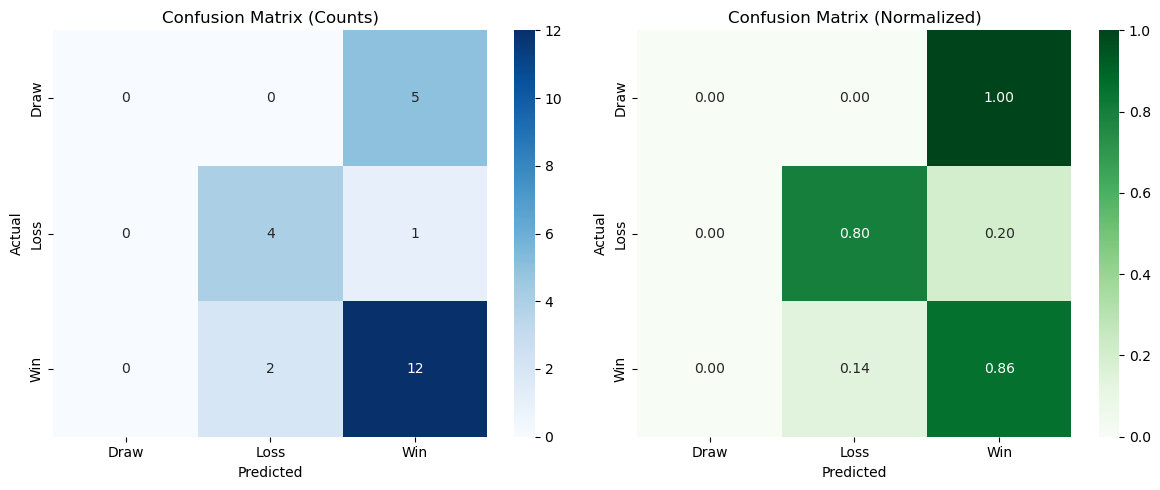


Classification Report:
              precision    recall  f1-score   support

        Draw       0.00      0.00      0.00         5
        Loss       0.67      0.80      0.73         5
         Win       0.67      0.86      0.75        14

    accuracy                           0.67        24
   macro avg       0.44      0.55      0.49        24
weighted avg       0.53      0.67      0.59        24



/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict
y_pred = rf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')  # Normalized by true class

labels = ['Draw', 'Loss', 'Win']

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Standard confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Confusion Matrix (Counts)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Normalized confusion matrix
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Confusion Matrix (Normalized)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=labels))


/var/folders/sb/lblxdqr177qbzrwt6_h7c7540000gn/T/ipykernel_10098/1917734207.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=result_counts.values , palette='viridis')


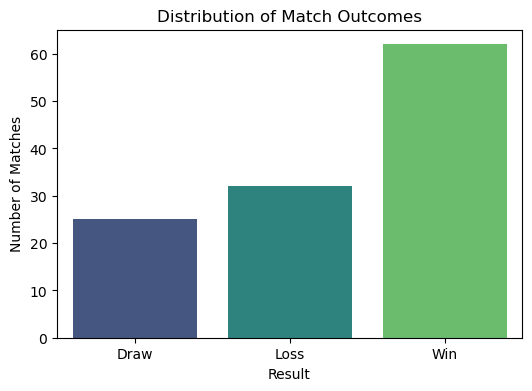

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Value counts
result_counts = data['result'].value_counts().sort_index()
labels = ['Draw', 'Loss', 'Win']

plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=result_counts.values , palette='viridis')
plt.title('Distribution of Match Outcomes')
plt.xlabel('Result')
plt.ylabel('Number of Matches')
plt.show()


/var/folders/sb/lblxdqr177qbzrwt6_h7c7540000gn/T/ipykernel_10098/1263405015.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10], palette='viridis')


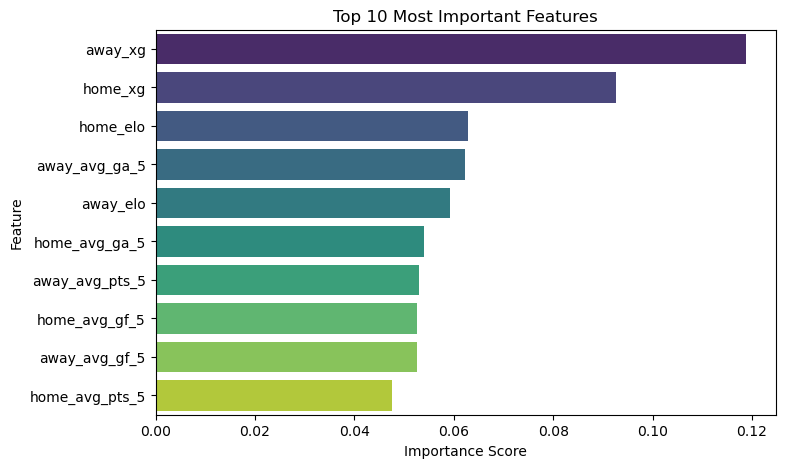

In [7]:
import pandas as pd
import numpy as np

# Get feature importances from your Random Forest
importances = rf.feature_importances_
features = X_train.columns

# Sort descending
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot top 10
plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10], palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [8]:
home_baseline_acc = (y_test == 2).mean()
print(f"Baseline (Always Home Win): {home_baseline_acc:.2f}")


Baseline (Always Home Win): 0.58


In [9]:
most_common = y_train.value_counts().idxmax()
print(most_common)
freq_baseline_acc = (y_test == most_common).mean()
print(f"Baseline (Most Frequent Class = {most_common}): {freq_baseline_acc:.2f}")


2
Baseline (Most Frequent Class = 2): 0.58


In [10]:
data['result'].value_counts()

result
2    62
1    32
0    25
Name: count, dtype: int64

XG BOOST

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Compute class weights (helps draw prediction!)
class_counts = y_train.value_counts()
total = len(y_train)
weights = {cls: total / count for cls, count in class_counts.items()}

sample_weight = y_train.map(weights)

xgb = XGBClassifier(
    objective="multi:softprob",
    num_class=3,
    learning_rate=0.05,
    n_estimators=800,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1.0,            # helps reduce overfitting
    reg_lambda=1.5,
    random_state=42
)

xgb.fit(X_train, y_train, sample_weight=sample_weight)

y_pred = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Draw", "Loss", "Win"]))


[[ 0  1  4]
 [ 0  5  0]
 [ 1  2 11]]
              precision    recall  f1-score   support

        Draw       0.00      0.00      0.00         5
        Loss       0.62      1.00      0.77         5
         Win       0.73      0.79      0.76        14

    accuracy                           0.67        24
   macro avg       0.45      0.60      0.51        24
weighted avg       0.56      0.67      0.60        24



In [12]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(
    iterations=1500,
    learning_rate=0.03,
    depth=8,
    loss_function="MultiClass",
    random_seed=42,
    class_weights=list(weights.values()),
    verbose=0
)

cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Draw", "Loss", "Win"]))


[[ 0  1  4]
 [ 0  4  1]
 [ 0  1 13]]
              precision    recall  f1-score   support

        Draw       0.00      0.00      0.00         5
        Loss       0.67      0.80      0.73         5
         Win       0.72      0.93      0.81        14

    accuracy                           0.71        24
   macro avg       0.46      0.58      0.51        24
weighted avg       0.56      0.71      0.63        24



/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
proba_xgb = xgb.predict_proba(X_test)
proba_cat = cat.predict_proba(X_test)

proba_avg = (proba_xgb + proba_cat) / 2
y_pred_ensemble = proba_avg.argmax(axis=1)

print(confusion_matrix(y_test, y_pred_ensemble))
print(classification_report(y_test, y_pred_ensemble))


[[ 0  1  4]
 [ 0  4  1]
 [ 1  3 10]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      0.80      0.62         5
           2       0.67      0.71      0.69        14

    accuracy                           0.58        24
   macro avg       0.39      0.50      0.44        24
weighted avg       0.49      0.58      0.53        24

